In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "/kaggle/input/linearregressionexp1/homeprices.csv"

data = pd.read_csv(file_path)

In [4]:
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [41]:
data.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


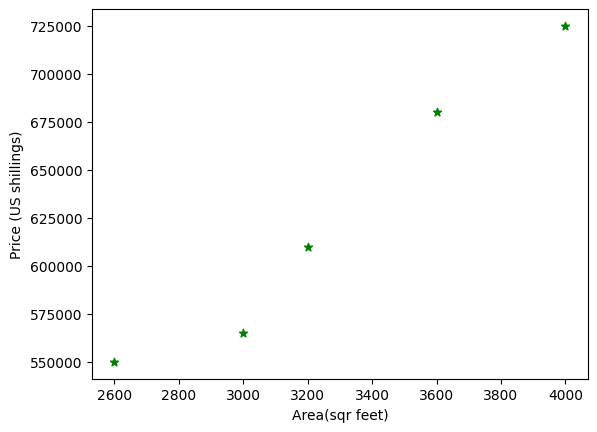

In [5]:
%matplotlib inline

plt.xlabel('Area(sqr feet)')
plt.ylabel('Price (US shillings)')
plt.scatter(data.area,data.price, color='green', marker='*')

From this graph, we can say that the data could be compatible with linear regression. 


In [6]:
reg = linear_model.LinearRegression()


In [7]:
xvalues = data.drop('price', axis='columns')
yvalues = data['price']

In [8]:
reg.fit(xvalues.values, yvalues)

LinearRegression()

In [9]:
reg.predict([[2000]])

array([452191.78082192])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

180616.43835616432

In [12]:
(2000 * 135.78767123 ) + 180616.43835616432

452191.78081616433

Working with absolutely new datasets to test our model. 

In [13]:
new_path = '/kaggle/input/linearregressionexp1/areas.csv'
new_df = pd.read_csv(new_path)
new_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [14]:
new_predictions = reg.predict(new_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [15]:
new_df['prices'] = new_predictions
new_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
new_df.to_csv('predictions.csv', index=False)

A visual representation of our linear equation. 

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


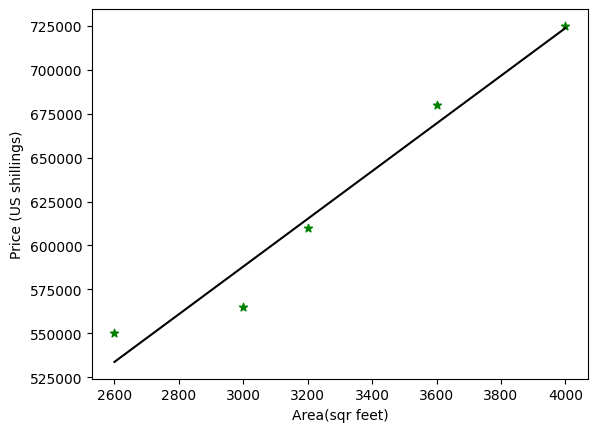

In [17]:
%matplotlib inline

plt.xlabel('Area(sqr feet)')
plt.ylabel('Price (US shillings)')
plt.scatter(data.area,data.price, color='green', marker='*')
plt.plot(data.area, reg.predict(data[['area']]), color='black')

And now multivariate linear regression. 


In [18]:
new_data = pd.read_csv('/kaggle/input/linearregressionexp1/homeprices-m.csv')

In [24]:
new_data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [22]:
import math
my_median = math.floor(new_data['bedrooms'].median())
my_median

4

In [32]:
new_data.fillna(my_median, inplace=True)

In [33]:
mreg = linear_model.LinearRegression()

In [34]:
xvalues = new_data.drop('price', axis='columns')
yvalues = new_data['price']

In [35]:
mreg.fit(xvalues.values, yvalues)

LinearRegression()

In [36]:
mreg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [37]:
mreg.intercept_

221323.00186540396

Let's predict the price of a 3-bedroomed, 3000 square feet house which is 40 years. 

In [39]:
mreg.predict([[3000, 3, 40]])

array([498408.25158031])

What about a 5 year old, 2500 square feet , 4 bedroomed house. 

In [40]:
mreg.predict([[2500, 4, 5]])

array([578876.03748933])

Evaluation with MAE, MSE, Rsquared and RMSE. 


In [50]:
features = new_data.drop('price', axis = 'columns')

In [51]:
new_predictions = mreg.predict(features)
new_predictions

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [52]:
y_test = new_data['price']
y_pred = new_predictions

Evaluation imports. 

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [58]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r_squared}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 15507.938665720061
Mean Squared Error (MSE): 446305128.22449154
R-squared (R²): 0.9550196399325821
Root Mean Squared Error (RMSE): 21125.93496687168


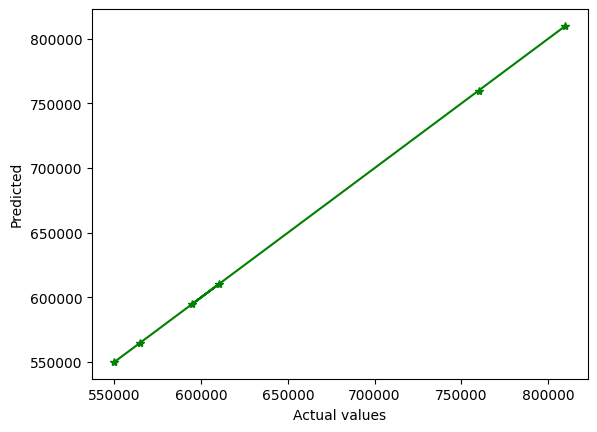

In [77]:
%matplotlib inline

plt.xlabel('Actual values')
plt.ylabel('Predicted')
plt.plot(y_test,y_test, color='green', marker='*')

The line is quite close to all the marks. 

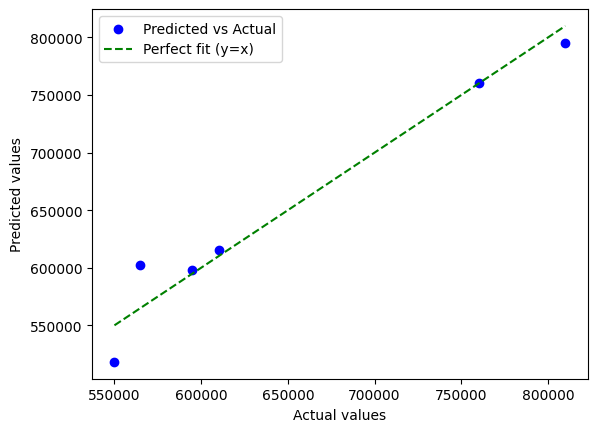

In [78]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Perfect fit (y=x)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


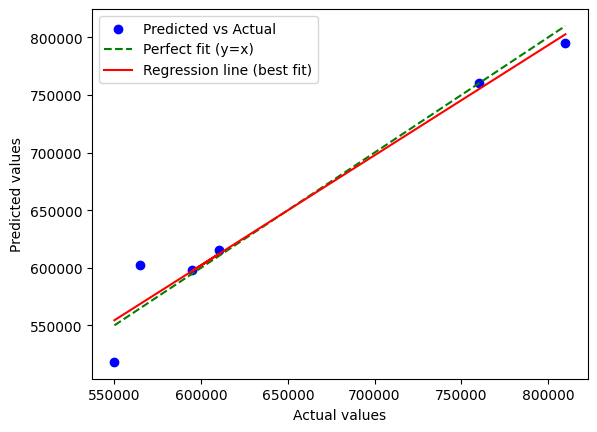

In [79]:
slope, intercept = np.polyfit(y_test, y_pred, 1)
reg_line = slope * np.array(y_test) + intercept

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Perfect fit (y=x)')
plt.plot(y_test, reg_line, color='red', label='Regression line (best fit)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

